# ChebLieNet: convolution, pooling and unpooling layers

In this tutorial, we introduce three kinds of neural network layers we are using in this thesis. The Chebyshev convolutional layer is a spectral method and has a diffusion effect on a original signal. The pooling and unpooling layer are used to modify an image resolution, by down-sampling and reduction (pooling) or by up-sampling and expansion (unpooling).

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import numpy as np
import torch

In [2]:
from cheblienet.graphs.graphs import SE2GEGraph, SO3GEGraph, R2GEGraph, S2GEGraph
from cheblienet.nn.layers.convs import ChebConv
from cheblienet.nn.layers.pools import SE2SpatialPool, SO3SpatialPool
from cheblienet.nn.layers.unpools import SE2SpatialUnpool, SO3SpatialUnpool
from cheblienet.utils.utils import delta_kronecker

In [3]:
def plot_signal(graph, signal, size):
    M, L = size
        
    fig = plt.figure(figsize=(3*L, 3))
    
    X, Y, Z = graph.cartesian_pos()
    
    for l in range(L):
        ax = fig.add_subplot(1, L, l + 1)
        ax.scatter(X[l*M:(l+1)*M], Y[l*M:(l+1)*M], Z[l*M:(l+1)*M], c=signal[...,l*M:(l+1)*M], cmap=cm.PiYG)
        ax.axis("off")
            
    fig.tight_layout()

## SE(2) Group Manifold Graph

### Convolutional layers

In [4]:
se2_graph = SE2GEGraph(
    [28, 28, 6],
    K=16,
    sigmas=(1., 0.1, 0.0026),
    path_to_graph="saved_graphs"
)

Graph already exists: LOADING...
Done!


In [5]:
in_channels = 1
out_channels = 1
kernel_size = 4
conv = ChebConv(in_channels, out_channels, kernel_size, se2_graph)

In [6]:
with torch.no_grad():
    input = delta_kronecker((1, 1, 28*28*6), (0,0,406))
    output = conv(input)

/data/aa/cheblienet/lib/python3.9/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


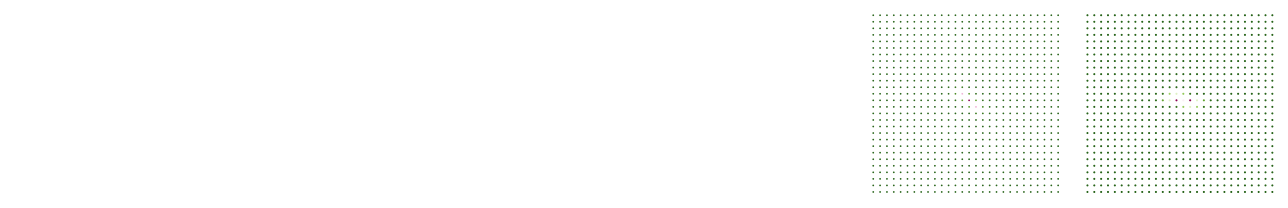

In [7]:
plot_signal(se2_graph, output, (784,6))

### Pooling and unpooling layers

In [8]:
up_se2_graph = R2GEGraph(
    [40, 40, 1],
    K=8,
    sigmas=(1., 1., 1.),
    path_to_graph="saved_graphs"
)

se2_graph = R2GEGraph(
    [20, 20, 1],
    K=8,
    sigmas=(1., 1., 1.),
    path_to_graph="saved_graphs"
)

down_se2_graph = R2GEGraph(
    [10, 10, 1],
    K=8,
    sigmas=(1., 1., 1.),
    path_to_graph="saved_graphs"
)

Graph does not already exist: INITIALIZATION...
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1600/1600 [00:01<00:00, 1068.69it/s]
Done!
Saved!
Graph does not already exist: INITIALIZATION...
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 2027.27it/s]
Done!
Saved!
Graph does not already exist: INITIALIZATION...
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1957.95it/s]
Done!
Saved!


In [9]:
input = torch.rand(20*20*1)

In [10]:
pool = SE2SpatialPool(2, (20, 20, 1), "rand")
unpool = SE2SpatialUnpool(2, (20, 20, 1), "rand")

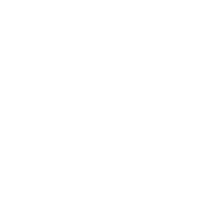

In [11]:
plot_signal(se2_graph, input, (20*20,1))

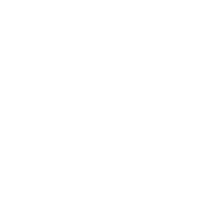

In [12]:
with torch.no_grad():
    plot_signal(down_se2_graph, pool(input), (10*10,1))

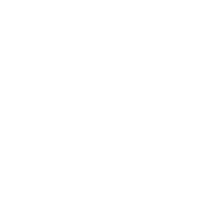

In [13]:
with torch.no_grad():
    plot_signal(up_se2_graph, unpool(input), (40*40,1))

## SO(3) Group Manifold Graph

### Convolutional layer

In [14]:
so3_graph = SO3GEGraph(
    size=[642, 6],
    K=32,
    sigmas=(1., .1, 10.0 / 642),
    path_to_graph="saved_graphs"
)

Graph already exists: LOADING...
Done!


In [15]:
in_channels = 1
out_channels = 1
kernel_size = 4
conv = ChebConv(in_channels, out_channels, kernel_size, so3_graph)

In [16]:
with torch.no_grad():
    input = delta_kronecker((1, 1, 642*6), (0,0,143))
    output = conv(input)

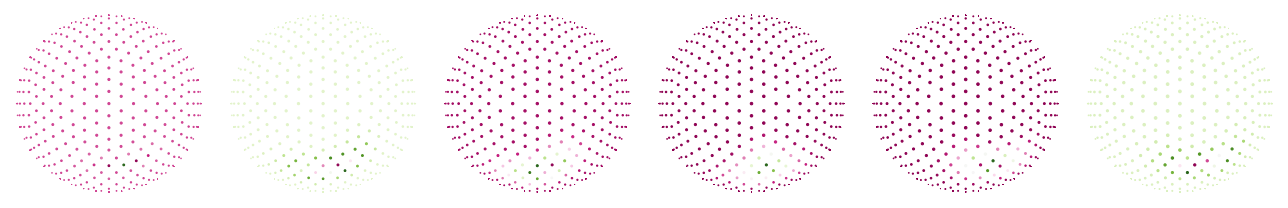

In [17]:
plot_signal(so3_graph, output, (642,6))

### Pooling and unpooling layers

In [18]:
up_so3_graph = S2GEGraph(
    size=[2562, 1],
    K=8,
    sigmas=(1., 1., 1.),
    path_to_graph="saved_graphs"
)

so3_graph = S2GEGraph(
    [642, 1],
    K=8,
    sigmas=(1., 1., 1.),
    path_to_graph="saved_graphs"
)

down_so3_graph = S2GEGraph(
    [162, 1],
    K=8,
    sigmas=(1., 1., 1.),
    path_to_graph="saved_graphs"
)

Graph does not already exist: INITIALIZATION...
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2562/2562 [00:08<00:00, 285.71it/s]
Done!
Saved!
Graph already exists: LOADING...
Done!
Graph does not already exist: INITIALIZATION...
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 162/162 [00:00<00:00, 579.10it/s]
Done!
Saved!


In [19]:
input = torch.rand(642*1)

In [20]:
pool = SO3SpatialPool(2, (642, 1), "max")
unpool = SO3SpatialUnpool(2, (642, 1), "avg")

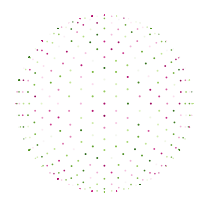

In [21]:
plot_signal(so3_graph, input, (642,1))

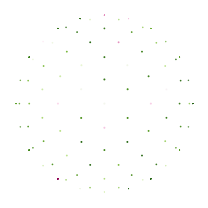

In [22]:
with torch.no_grad():
    plot_signal(down_so3_graph, pool(input), (162,1))

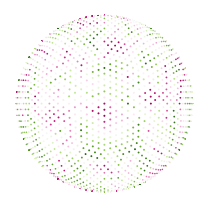

In [23]:
with torch.no_grad():
    plot_signal(up_so3_graph, unpool(input), (2562,1))